In [1]:
import pandas as pd
import numpy as np
from numpy import absolute
from numpy import mean
from numpy import std
from numpy import arange
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PowerTransformer

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
#Calculates the mean values of Fss, Fsv, and Fvv across all rows of their 96 columns

train['Fss_mean'] = train.iloc[:, 4:100].apply(np.mean, axis = 1)
train['Fsv_mean'] = train.iloc[:, 100:196].apply(np.mean, axis = 1)
train['Fvv_mean'] = train.iloc[:, 196:292].apply(np.mean, axis = 1)

test['Fss_mean'] = test.iloc[:, 3:99].apply(np.mean, axis = 1)
test['Fsv_mean'] = test.iloc[:, 99:195].apply(np.mean, axis = 1)
test['Fvv_mean'] = test.iloc[:, 195:291].apply(np.mean, axis = 1)

In [5]:
#Drops the Fss, Fsv, and Fvv columns that were used to calculate the mean values in the block above

train = train.drop(train.iloc[:, 4:292], axis = 1)
test = test.drop(test.iloc[:, 3:291], axis = 1)

In [6]:
#Assigns our predictor and target variables from our training dataset

X = train[['phi', 's', 'tau', 'Fss_mean', 'Fsv_mean', 'Fvv_mean']]
y = train['permeability']

In [7]:
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

In [8]:
ridge = Ridge(normalize = True)

In [9]:
for alpha in alpha_space: 
    ridge.alpha = alpha
    ridge_cv_scores = cross_val_score(ridge, X, y, cv = 10)
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))

In [10]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

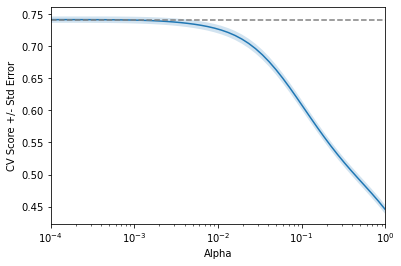

In [13]:
display_plot(ridge_scores, ridge_scores_std)